In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [51]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows
# (Show the shape and column names as well.)
df = pd.read_csv("BIKE DETAILS.csv")
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [52]:
df.shape

(1061, 7)

In [53]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [54]:
# Question 2: Check for missing values in all columns and describe your approach for handling them

# Number of null values in each column
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [55]:
# For numeric columns -> fill with median because outlier treatment not done yet
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

In [56]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

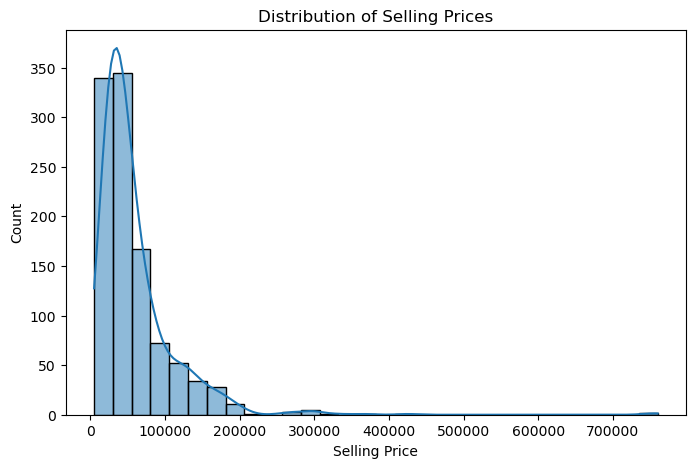

In [57]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()


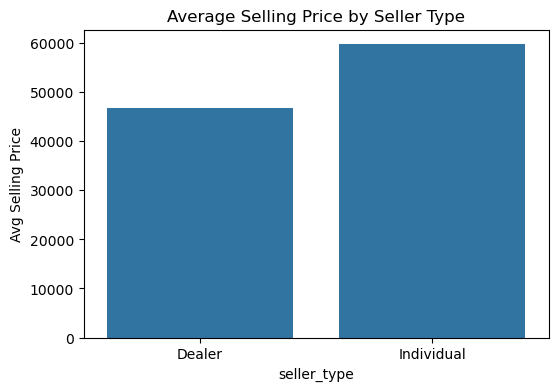

In [58]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

 
avg_price = df.groupby('seller_type')['selling_price'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Average Selling Price by Seller Type")
plt.ylabel("Avg Selling Price")
plt.show()

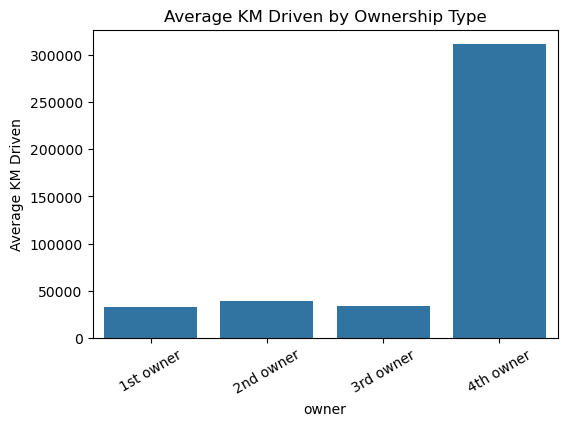

In [59]:
# Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot
avg_km = df.groupby('owner')['km_driven'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=avg_km.index, y=avg_km.values)
plt.title("Average KM Driven by Ownership Type")
plt.ylabel("Average KM Driven")
plt.xticks(rotation=30)
plt.show()

In [60]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

print("Before:\n", df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df=df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]

print("\nAfter removing outliers:\n", df['km_driven'].describe())


Before:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


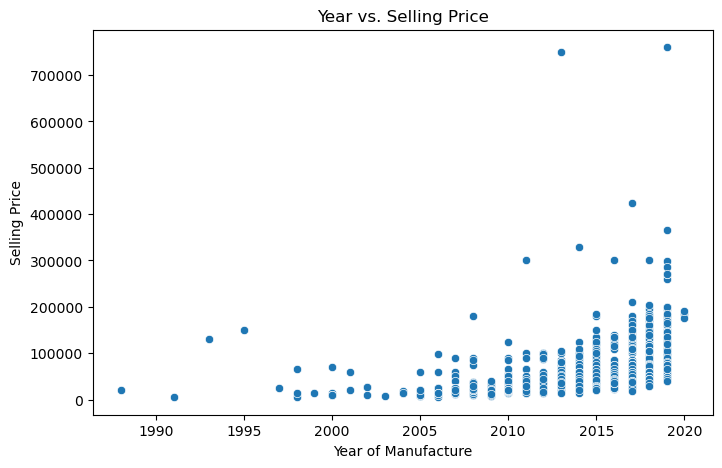

In [61]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title("Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()

In [63]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
from sklearn.preprocessing import OneHotEncoder

# Select the column
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
encoded = encoder.fit_transform(df[['seller_type']])

# Convert to DataFrame with column names
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['seller_type']))

# Concatenate back with original DataFrame (dropping old column)
df_encoded = pd.concat([df.drop('seller_type', axis=1), encoded_df], axis=1)

# Show first 5 rows
df_encoded.head()




,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000.0,2019.0,1st owner,350.0,72752.5,1.0
1,Honda Dio,45000.0,2017.0,1st owner,5650.0,72752.5,1.0
2,Royal Enfield Classic Gunmetal Grey,150000.0,2018.0,1st owner,12000.0,148114.0,1.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015.0,1st owner,23000.0,89643.0,1.0
4,Yamaha SZ [2013-2014],20000.0,2011.0,2nd owner,21000.0,72752.5,1.0


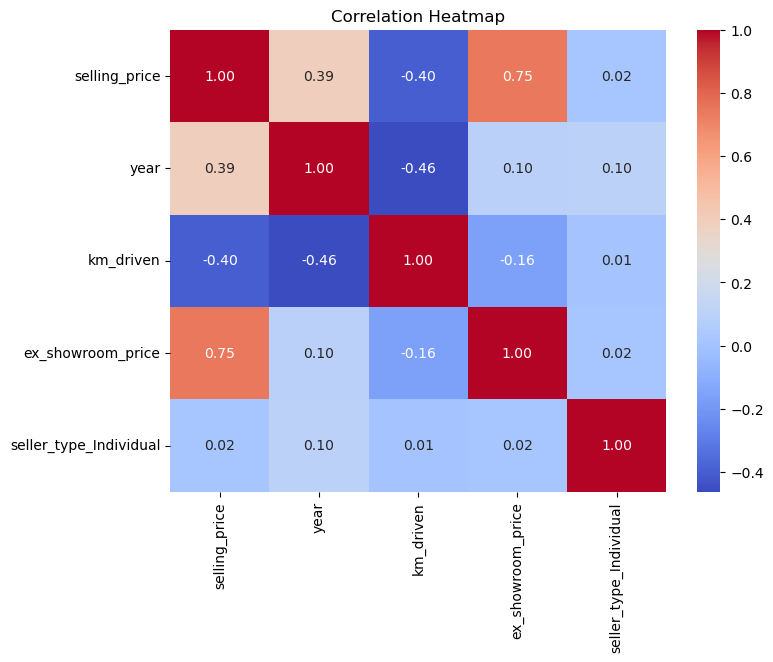

In [66]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns What correlations stand out the most?
plt.figure(figsize=(8,6))

# Select only numeric columns
corr = df_encoded.select_dtypes(include=['int64', 'float64']).corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [67]:
#Question 10: Summarize your findings in a brief report:
#● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.

In [ ]:
#Answe